In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
F = len('Kamil')
L = len('Baradziej')

## Excercise 1 - Generated Quantities Block

In [5]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [7]:
samples = gen_quant.sample(data={'M':F}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


In [8]:
df = samples.draws_pd()
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5]
0,0.0,0.0,9.25448,10.0,12.0,12.0,7.0,8.0
1,0.0,0.0,112.32300,108.0,107.0,103.0,112.0,115.0
2,0.0,0.0,152.78100,165.0,154.0,159.0,136.0,158.0
3,0.0,0.0,184.42500,191.0,188.0,182.0,195.0,180.0
4,0.0,0.0,180.24500,197.0,182.0,214.0,191.0,165.0
...,...,...,...,...,...,...,...,...
995,0.0,0.0,84.44720,90.0,87.0,90.0,94.0,77.0
996,0.0,0.0,10.46150,12.0,13.0,12.0,11.0,4.0
997,0.0,0.0,34.56810,32.0,30.0,35.0,39.0,23.0
998,0.0,0.0,1.40162,0.0,3.0,3.0,0.0,4.0


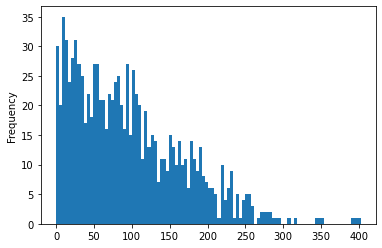

In [11]:
Lambda = df['lambda']
Lambda.plot.hist(bins=100)
plt.show()

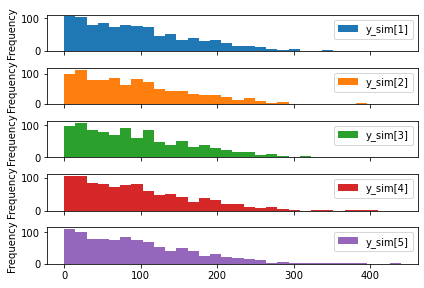

In [13]:
df2 = df.drop(df.columns[0:3],axis=1) 
df2.plot.hist(subplots=True, bins=30) 
plt.tight_layout()
plt.show()

## Excercise 2 - constraints on the data

